Accuracy: 0.9777070063694268

 Classification Report:

                               precision    recall  f1-score   support

             anlamadım_yinele       0.50      1.00      0.67         1
           basortulu_fotograf       1.00      1.00      1.00         9
      basvuru_kilavuzu_edinme       1.00      1.00      1.00         9
    basvuru_merkezinden_yapma       0.96      1.00      0.98        23
   basvuru_sartlari_sorgulama       1.00      1.00      1.00         9
               basvuru_sorusu       1.00      0.60      0.75         5
  basvuru_tarihleri_sorgulama       1.00      1.00      1.00         9
     basvuru_ucreti_sorgulama       1.00      1.00      1.00         9
       basvuru_yapma_bireysel       1.00      1.00      1.00         9
                 belge_talebi       1.00      1.00      1.00         3
        engelli_salon_basvuru       1.00      1.00      1.00        16
          gazi_sehit_muafiyet       0.96      1.00      0.98        25
                  gec

c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


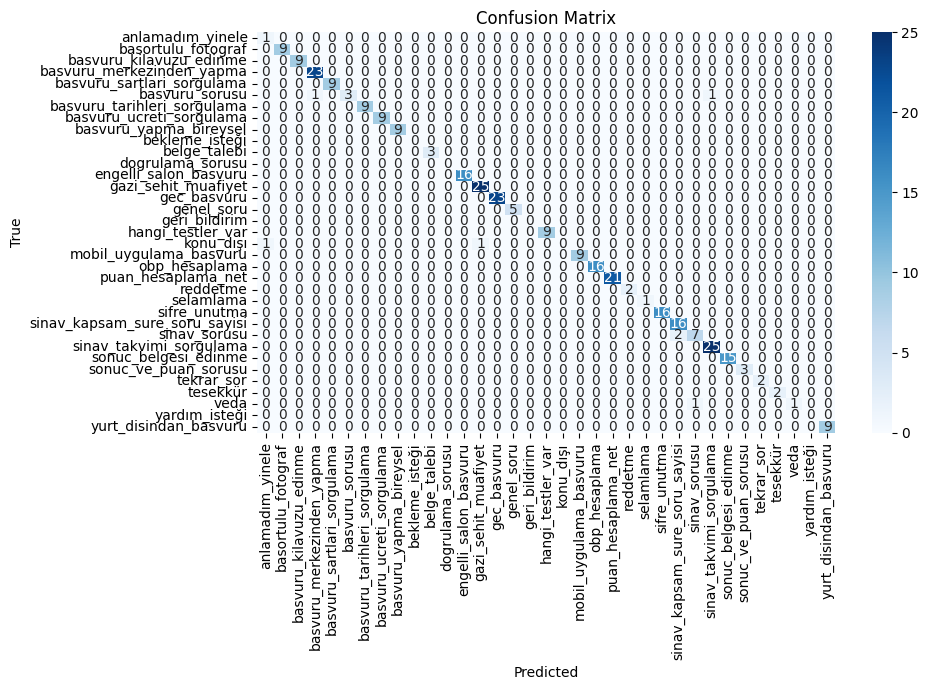


Yanlış sınıflandırılan örnekler:
• 'ÖSYM Başvuru Merkezlerinin adreslerini nerede bulabilirim?' → Gerçek: basvuru_sorusu, Tahmin: basvuru_merkezinden_yapma
• 'Komik bir şey söyler misin?' → Gerçek: konu_dışı, Tahmin: anlamadım_yinele
• '6 Şubat-3 Mart 2025 tarihleri arasında 2025-YKS başvurumu yapamadım, ne yapmalıyım?' → Gerçek: basvuru_sorusu, Tahmin: sinav_takvimi_sorgulama
• 'Acaba Sınav esnasında gözetmenle sorun yaşadım. Şikâyet etmek istiyorum, nasıl hemen öğrenmem gerek.' → Gerçek: sinav_sorusu, Tahmin: sinav_kapsam_sure_soru_sayisi
• 'Kendinize iyi bakın' → Gerçek: veda, Tahmin: sinav_sorusu
• 'Lütfen bana Sınav esnasında gözetmenle sorun yaşadım. Şikâyet etmek istiyorum, nasıl detay verir misiniz?' → Gerçek: sinav_sorusu, Tahmin: sinav_kapsam_sure_soru_sayisi
• 'Türkiye'nin nüfusu ne kadar?' → Gerçek: konu_dışı, Tahmin: gazi_sehit_muafiyet


In [2]:
# intent_classifier_evaluation.py
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn.model_selection import train_test_split

# Veri yükleme
df = pd.read_excel("../data/chatbot_dataset.xlsx").dropna()

# Embedding modeli
embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

# Veri bölme
X = df["user_message"].tolist()
y = df["Intent"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Embedding
X_train_vec = embedding_model.encode(X_train)
X_test_vec = embedding_model.encode(X_test)

# Label Encoding
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Model eğitimi
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_vec, y_train_enc)

# Tahmin
y_pred_enc = clf.predict(X_test_vec)
y_pred = le.inverse_transform(y_pred_enc)
y_test_label = le.inverse_transform(y_test_enc)

# Başarı metrikleri
print("Accuracy:", accuracy_score(y_test_label, y_pred))
print("\n Classification Report:\n")
print(classification_report(y_test_label, y_pred))

# Confusion Matrix görselleştirme
cm = confusion_matrix(y_test_label, y_pred, labels=le.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

# Hatalı sınıflandırmalar
print("\nYanlış sınıflandırılan örnekler:")
for text, true_label, pred_label in zip(X_test, y_test_label, y_pred):
    if true_label != pred_label:
        print(f"• '{text}' → Gerçek: {true_label}, Tahmin: {pred_label}")


In [1]:
# Intent Sınıflandırma (Embedding + LogisticRegression)
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import joblib

# Veri Yükleme (Intent datası)
df = pd.read_excel("../data/chatbot_dataset.xlsx")
df = df.dropna()

# Embedding modeli
embedding_model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
X = embedding_model.encode(df["user_message"].tolist())
le = LabelEncoder()
y = le.fit_transform(df["Intent"])

# Model Eğitim
clf = LogisticRegression(max_iter=1000)
clf.fit(X, y)

# Kaydet
joblib.dump(clf, "../data/intent_classifier.joblib")
joblib.dump(le, "../data/label_encoder.joblib")

# Tahmin Fonk.
def predict_intent(text):
    vec = embedding_model.encode([text])
    pred = clf.predict(vec)
    return le.inverse_transform(pred)[0]

c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#FAISS İndex Oluşturma (PDF)
from langchain_community.document_loaders import PyPDFLoader

# PDF yükleme
loader = PyPDFLoader("../data/sss.pdf")
docs = loader.load()

In [3]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Chunking
splitter = RecursiveCharacterTextSplitter(chunk_size=700, chunk_overlap=50)
chunks = splitter.split_documents(docs)

In [5]:
#from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS

#embedding = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
vectorstore = FAISS.from_documents(chunks, embedding)

C:\Users\user\AppData\Local\Temp\ipykernel_20012\1478844333.py:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")


In [6]:
import os
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter

retriever = vectorstore.as_retriever(
    search_type="similarity", search_kwargs={"k": 7}
)

In [7]:
retieved_docs = retriever.invoke(" YKS 2025 ne zaman yapılacak?")

In [8]:
print(retieved_docs[6].page_content)

2025-TYT: 21 Haziran 2025 Cumartesi, 165 dakika 
2025-AYT: 22 Haziran 2025 Pazar, 180 dakika  
2025-YDT: 22 Haziran 2025 Pazar, 120 dakika 
29. 2025-YKS’de sınav binasına en geç saat kaçta girilebilir? 
Adaylar, sınavın sabah oturumlarında saat 10.00’dan sonra; öğleden sonra oturumunda ise saat 
15.30’dan sonra sınav binalarına alınmazlar. 
30. Sınav binasına ne zaman gelmeliyim? 
Kimlik ve güvenlik kontrolleri ile salona giriş işlemlerinin zamanında yapılabilmesi için, adayların 
sınava girecekleri binanın giriş kapısında sınav saatinden en az 1 saat önce hazır bulunmaları 
gerekmektedir. 
31. 2025-YKS için Sınava Giriş Belgemi nasıl alabilirim?


In [9]:
from dotenv import load_dotenv

load_dotenv()

True

In [10]:
import google.generativeai as genai
import os
genai.configure(api_key=os.getenv("Gemini_API"))

In [34]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lit

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI
# Gemini LLM
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash-latest",
    temperature=0.3,
    max_tokens=500,
    google_api_key=os.getenv("Gemini_API"),convert_system_message_to_human=True
)

In [14]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import create_retrieval_chain

# Prompt
system_prompt = (
    " Ölçme, Seçme ve Yerleştirme Merkezi Başkanlığı (ÖSYM) hakkında uzman bir yardımcı botsun."
    "Kullanıcıdan gelen sorulara aşağıda verilen içerikleri kullanarak  doğru cevaplar ver. "
    "Eğer cevap içeriğin içinde yoksa, bunu dürüstçe belirt. "
    "Yanıtlarını en fazla üç cümlede kısa ve öz şekilde ver.\n\n{context}"
)

prompt = ChatPromptTemplate.from_messages([
    ("system", system_prompt),
    ("human", "{input}")
])

# QA Zinciri
question_answer_chain = create_stuff_documents_chain(llm, prompt)
rag_chain = create_retrieval_chain(retriever, question_answer_chain)

In [15]:
# Tüm Akış (Intent + RAG + Gemini)
def full_pipeline(user_question):
    intent = predict_intent(user_question)
    print(f"Intent: {intent}")

    # Konu dışı veya tanınmayan intent geldiğinde LLM çalıştırma
    if intent in ["konu_dışı", "unknown"]:
        answer = "\n Bu konuda yardımcı olamıyorum. Lütfen ÖSYM sitesi hakkında bir soru sorunuz."
        print(f"\n Yanıt: {answer}\n")
        return

    # Diğer intent'lerde RAG zinciri çalıştırılır
    response = rag_chain.invoke({"input": user_question})
    answer = response.get("answer")
    print(f"\n Yanıt: {answer}\n Kaynak: Gemini + PDF")


In [16]:
# Test
full_pipeline("selamlar")

Intent: selamlama


c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\langchain_google_genai\chat_models.py:357: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



 Yanıt: ÖSYM (Ölçme, Seçme ve Yerleştirme Merkezi Başkanlığı) ile ilgili sorularınızı yanıtlayabilirim ancak verdiğiniz metin Jandarma Genel Komutanlığı ve Anadolu Üniversitesi Açıköğretim Fakültesi'ne ait bilgiler içeriyor.  ÖSYM'ye ait bilgi içermediği için sorularınıza cevap veremem.  Lütfen ÖSYM ile ilgili metin sağlayın.
 Kaynak: Gemini + PDF


In [17]:
# Test
full_pipeline("2025 YKS başvuru tarihleri nedir?")

Intent: sinav_takvimi_sorgulama


c:\Users\user\miniconda3\envs\rag_env\lib\site-packages\langchain_google_genai\chat_models.py:357: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



 Yanıt: İşte ÖSYM 2025-YKS sınavı ile ilgili sorularınızın cevapları:

**6. 2025-YKS Kılavuzu:** Kılavuza ÖSYM'nin resmi internet sitesi (www.osym.gov.tr) üzerinden "Duyurular" bölümünden ulaşabilirsiniz.  Verdiğiniz link de doğrudan kılavuza ulaşmanızı sağlar.

**7. 2025-YKS Başvuru Tarihleri:** 2025-YKS başvuruları 6 Şubat - 3 Mart 2025 tarihleri arasında yapılacaktır.

**8. 2025-YKS Başvuru Yeri:** Başvurular ÖSYM Aday İşlemleri Sistemi (ais.osym.gov.tr) üzerinden online, mobil uygulama ile veya ÖSYM başvuru merkezlerinden yapılabilir.
 Kaynak: Gemini + PDF


In [19]:
# Test
full_pipeline("sınavda görme engellilere ek süre verilecek mi?")

Intent: engelli_salon_basvuru

 Yanıt: Evet, görme engelli adaylar sınavda ek süre alabilirler. Bunun için Ek-2’de açıklanan tanıları, engel düzeyleri ve Sağlık Bakanlığı ICD-10-TRM Hastalık ve Sağlık Girişimi Sınıflandırma kodlarına uygun olmaları gerekmektedir. Ayrıca, gerekli belgelerin ÖSYM'ye sunulması şarttır.
 Kaynak: Gemini + PDF


In [18]:
# Test
full_pipeline("coldplay konseri ne zaman?")

Intent: konu_dışı

 Yanıt: 
 Bu konuda yardımcı olamıyorum. Lütfen ÖSYM sitesi hakkında bir soru sorunuz.



In [ ]:
from evaluate import load

test_questions = [
    "YKS başvuruları ne zaman başlıyor?",
    "Sınav ücretleri ne kadar?",
    "Geç başvuru tarihi nedir?"
]

reference_answers = [
    "2025-YKS başvuruları 6 Şubat - 3 Mart 2025 tarihleri arasında",
    "Sınav ücreti sadece TYT 450 TL'dir.TYT+AYT veya YDT için 900 TL'dir.",
    "Geç başvuru tarihleri 11-13 Mart 2025'tir."
]

# Örnek cevaplar (Gerçekte: gemini_answers = [full_pipeline(q) for q in test_questions])
gemini_answers = [
    "2025 YKS başvuruları 6 Şubat - 3 Mart 2025 arasında yapılacaktır.",
    "TYT sınavı için ücret 450 TL, TYT+AYT veya YDT için toplamda 900 TL'dir.",
    "Geç başvuru tarihi 11-13 Mart 2025 olarak belirlenmiştir."
]

# Referansları liste listesi haline getir
reference_answers_formatted = [[ref] for ref in reference_answers]

bertscore = load("bertscore")

gemini_scores = bertscore.compute(
    predictions=gemini_answers,
    references=reference_answers_formatted,
    lang="tr"
)


# BERTScore hesaplama
print("\nBERTScore Sonuçları:") 
print(f"Gemini BERTScore F1: {sum(gemini_scores['f1']) / len(gemini_scores['f1']):.4f}")
print(f"Gemini BERTScore Precision: {sum(gemini_scores['precision']) / len(gemini_scores['precision']):.4f}")   
print(f"Gemini BERTScore Recall: {sum(gemini_scores['recall']) / len(gemini_scores['recall']):.4f}")



BERTScore Sonuçları:
Gemini BERTScore F1: 0.8889
Gemini BERTScore Precision: 0.8887
Gemini BERTScore Recall: 0.8892
